In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


## Function to apply the model and predict


In [2]:
def apply_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

## Function to evaluate the model and produce metrics


In [3]:
# Function to evaluate the model and produce metrics
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

    return precision, recall, f1, cm, roc_auc

## Load the dataset into a pandas DataFrame


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalBalancedDataset.csv')

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')


In [6]:
X_column_name = 'tweet'
y_column_name = 'Toxicity'

In [7]:
X = df[X_column_name]
y = df[y_column_name]

## Bag of Words


In [8]:
#vectorizing using count vectorizer or bag of words


vectorizer_bow = CountVectorizer()

X_bow = vectorizer_bow.fit_transform(X)

## TF-IDF


In [9]:
#vectorizing using tf-idf

vectorizer_tfidf = TfidfVectorizer()

X_tfidf = vectorizer_tfidf.fit_transform(X)

## Split data into training and testing sets


In [10]:
# splitting using bow vectors
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# splitting using tf-ifd vectors
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Decision Tree


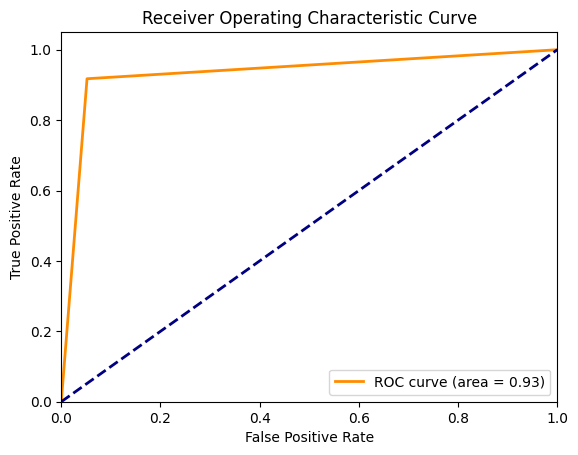

In [11]:
#defining decison tree model
dt_model = DecisionTreeClassifier()

# fitting model and predicting using using bow vectors
# since apply model returns y_pred value so -----> predicted vector using technique bow is stored in the below variable which we will use to evaluate results
dt_pred_bow = apply_model(X_train_bow, X_test_bow, y_train, y_test, dt_model)

# evaluating and plotting
dt_metrics_bow = evaluate_model(y_test, dt_pred_bow)




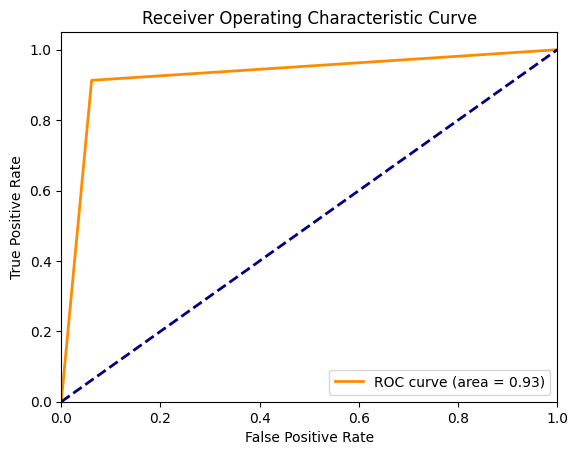

In [12]:
# fitting model and predicting using using tf-idf vectors
# since apply model returns y_pred value so -----> predicted vector using technique/vectorizer tf-idf is stored in the below variable which we will use to evaluate results
dt_pred_tfidf = apply_model(X_train_tfidf, X_test_tfidf, y_train, y_test, dt_model)

# evaluating and plotting
dt_metrics_tfidf = evaluate_model(y_test, dt_pred_tfidf)

## Random Forest


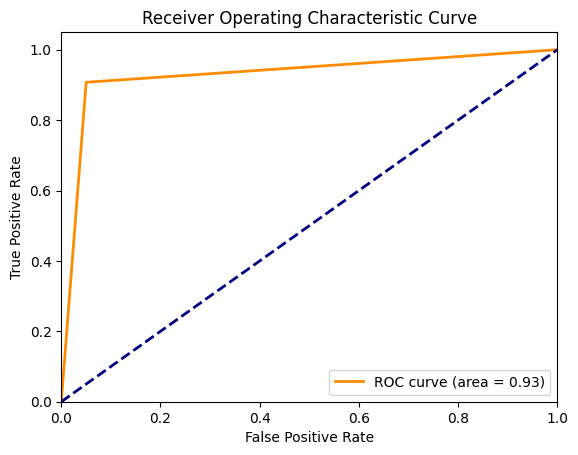

In [13]:
rf_model = RandomForestClassifier()


rf_pred_bow = apply_model(X_train_bow, X_test_bow, y_train, y_test, rf_model)

rf_metrics_bow = evaluate_model(y_test,rf_pred_bow)




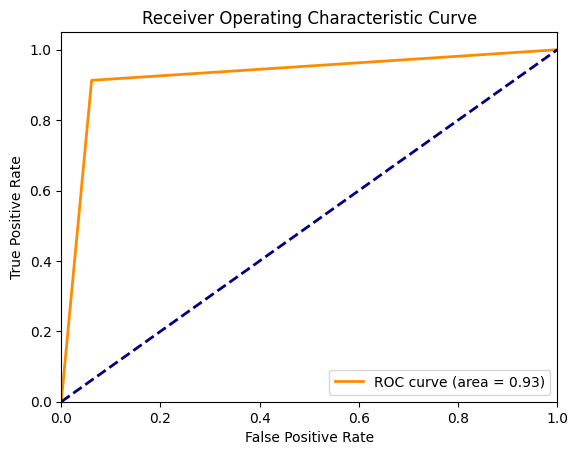

In [14]:
rf_pred_tfidf = apply_model(X_train_tfidf, X_test_tfidf, y_train, y_test, rf_model)

# evaluating and plotting
rf_metrics_tfidf = evaluate_model(y_test, dt_pred_tfidf)


## Naive Bayes


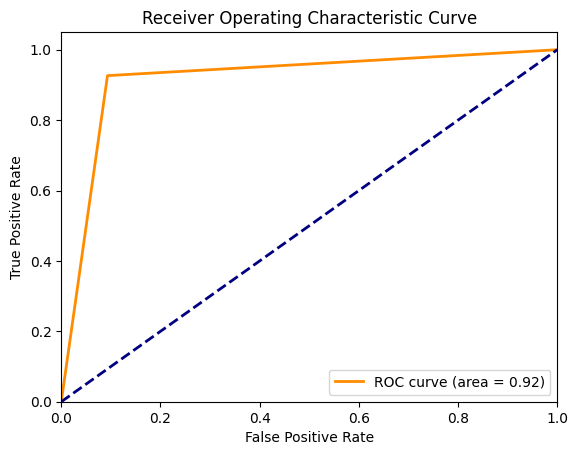

In [15]:
nb_model = MultinomialNB()
nb_pred_bow = apply_model(X_train_bow, X_test_bow, y_train, y_test, nb_model)

nb_metrics_bow = evaluate_model(y_test, nb_pred_bow)


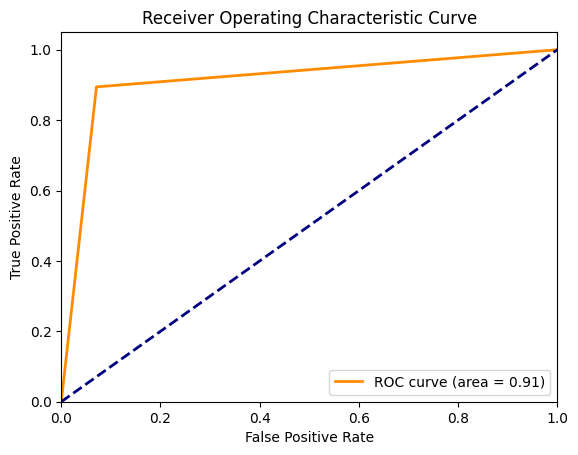

In [16]:
nb_pred_tfidf = apply_model(X_train_tfidf, X_test_tfidf, y_train, y_test, nb_model)

nb_metrics_tfidf = evaluate_model(y_test, nb_pred_tfidf)

## K-NN Classifier


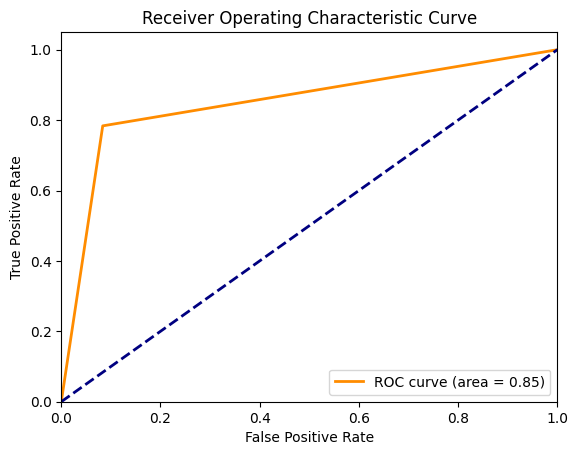

In [17]:
knn_model = KNeighborsClassifier()
knn_pred_bow = apply_model(X_train_bow, X_test_bow, y_train, y_test, knn_model)

knn_metrics_bow = evaluate_model(y_test, knn_pred_bow)


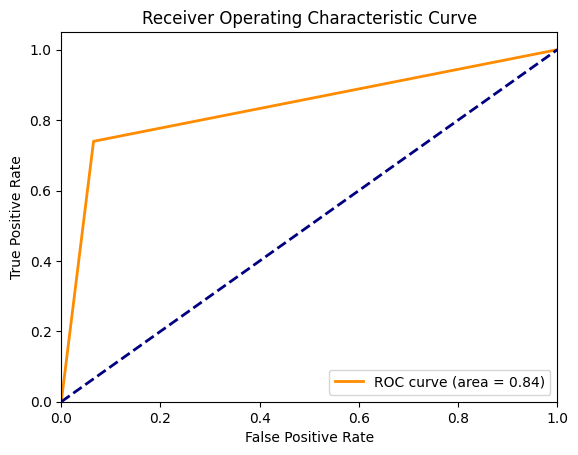

In [18]:
knn_pred_tfidf = apply_model(X_train_tfidf, X_test_tfidf, y_train, y_test, knn_model)

knn_metrics_tfidf = evaluate_model(y_test, knn_pred_tfidf)

## SVM


In [ ]:
svm_model = SVC(probability=True)

svm_pred_bow = apply_model(X_train_bow, X_test_bow, y_train, y_test, svm_model)

svm_metrics_bow = evaluate_model(y_test, svm_pred_bow)


In [ ]:
svm_pred_tfidf = apply_model(X_train_tfidf, X_test_tfidf, y_train, y_test, svm_model)

svm_metrics_tfidf = evaluate_model(y_test, svm_pred_tfidf)